In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from math import sqrt

In [2]:
df = pd.read_csv(r'C:\Users\krish\Downloads\iGem_data1.csv')
df

,S.NO,SUBSTRATE CONCENTRATION (uM),REACTION VELOCITY (uM/s),ENZYME CONCENTRATION (uM),TEMPERATURE,PH,Vm (uM/s),Km (uM),Kcat (s^-1)
0,1,0.1,0.5,0.05,25,7.2,11.0,2.100000,220
1,2,0.5,2.0,0.05,25,7.2,11.0,2.250000,220
2,3,1.0,3.5,0.05,25,7.2,11.0,2.142857,220
3,4,5.0,7.0,0.05,25,7.2,11.0,2.857143,220
4,5,10.0,9.0,0.05,25,7.2,11.0,2.222222,220
5,6,20.0,10.5,0.05,25,7.2,11.0,0.952381,220
6,7,50.0,11.0,0.05,25,7.2,11.0,0.000000,220
7,8,0.1,0.2,0.10,25,7.2,8.5,4.150000,85
8,9,0.5,0.8,0.10,25,7.2,8.5,4.812500,85
9,10,1.0,1.5,0.10,25,7.2,8.5,4.666667,85


In [3]:
df.columns

Index(['S.NO', 'SUBSTRATE CONCENTRATION (uM)', 'REACTION VELOCITY (uM/s)',
       'ENZYME CONCENTRATION (uM)', 'TEMPERATURE ', 'PH', 'Vm (uM/s)',
       'Km (uM) ', 'Kcat (s^-1)'],
      dtype='object')

In [4]:
df.rename(columns = {'SUBSTRATE CONCENTRATION (uM)':'[S]', 'REACTION VELOCITY (uM/s)':'V0', 'ENZYME CONCENTRATION (uM)':'[E]', 
                    'TEMPERATURE ':'Temp', 'Vm (uM/s)':'Vm', 'Km (uM) ': 'Km', 'Kcat (s^-1)':'Kcat'}, inplace = True)

In [5]:
df.columns

Index(['S.NO', '[S]', 'V0', '[E]', 'Temp', 'PH', 'Vm', 'Km', 'Kcat'], dtype='object')

In [6]:
x = (1/df['[S]']).tolist()
y = (1/df['V0']).tolist()

In [7]:
m, c = np.polyfit(x,y,1)
line_x = [0,1,2,3,4]
line_y = [1,1,1,1,1]
for i in range(0, 5):
    line_y[i] = m*i + c;
line_y

[0.12448328484411775,
 0.46357743082400826,
 0.8026715768038988,
 1.1417657227837892,
 1.4808598687636798]

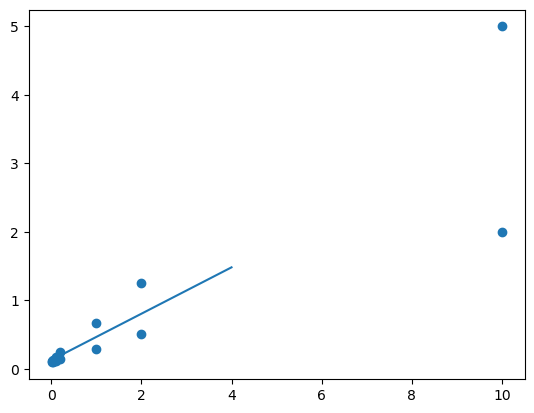

In [8]:
mp.scatter(x,y)
mp.plot(line_x,line_y)
mp.show()

In [9]:
print("Estimated Vm value = ", 1/c)

Estimated Vm value =  8.03320703861755


In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
km_model = LinearRegression()

In [12]:
km_x = df.loc[:, ['[S]', 'V0', '[E]', 'Temp', 'PH', 'Vm']]
km_y = df['Km']

In [14]:
km_model.fit(km_x,km_y)

LinearRegression()

In [15]:
pd.DataFrame( {
              "Intercept":km_model.intercept_ , \
              "Coefficients":km_model.coef_ , \
              "Variables":km_x.columns
             } )

,Intercept,Coefficients,Variables
0,11.75089,-9.046591e-02,[S]
1,11.75089,1.001362e-01,V0
2,11.75089,1.721019e-02,[E]
3,11.75089,0.000000e+00,Temp
4,11.75089,-4.642705e-31,PH
5,11.75089,-8.605095e-01,Vm


In [17]:
from sklearn.metrics import r2_score, mean_squared_error
predicted = km_model.predict(km_x)
r2val = r2_score(km_y,predicted)
print(r2val)

0.8784652989943593


In [18]:
rmse = sqrt(mean_squared_error(km_y, predicted))
print("RMSE:", rmse)

RMSE: 0.5881939582280716


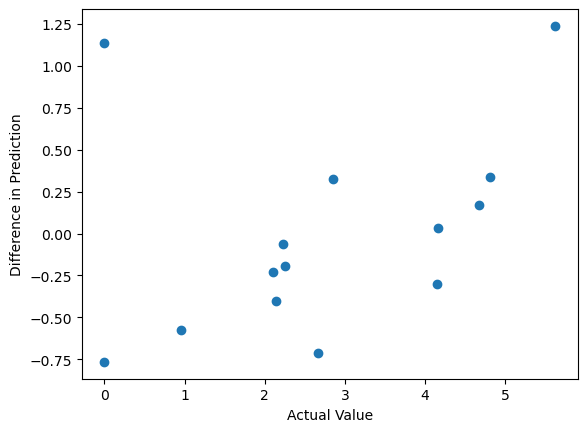

In [19]:
plt.scatter(km_y,km_y-predicted)
plt.xlabel("Actual Value")
plt.ylabel("Difference in Prediction")
plt.show()

In [20]:
kcat_x = df.loc[:, ['[S]', 'V0', '[E]', 'Temp', 'PH', 'Vm']]
kcat_y = df['Kcat']

In [21]:
kcat_model = LinearRegression()
kcat_model.fit(kcat_x,kcat_y)

LinearRegression()

In [22]:
pd.DataFrame( {
              "Intercept":kcat_model.intercept_ , \
              "Coefficients":kcat_model.coef_ , \
              "Variables":kcat_x.columns
             } )

,Intercept,Coefficients,Variables
0,-373.708517,0.000000e+00,[S]
1,-373.708517,-1.142200e-15,V0
2,-373.708517,-1.079568e+00,[E]
3,-373.708517,0.000000e+00,Temp
4,-373.708517,2.882764e-29,PH
5,-373.708517,5.397841e+01,Vm


In [23]:
kcat_predicted = kcat_model.predict(kcat_x)
r2val = r2_score(kcat_y,kcat_predicted)
print(r2val)

1.0


In [24]:
rmse = sqrt(mean_squared_error(kcat_y, kcat_predicted))
print("RMSE:", rmse)

RMSE: 5.262677972112621e-14


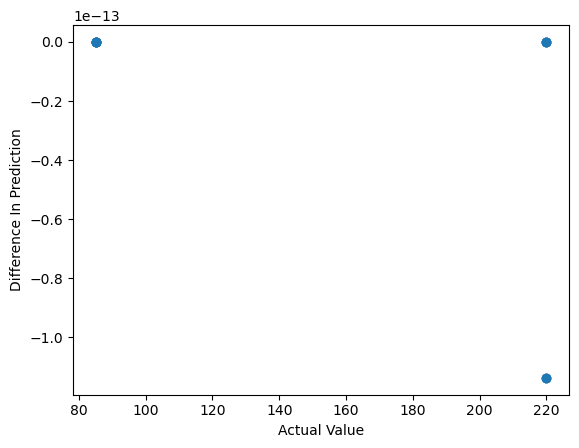

In [25]:
plt.scatter(kcat_y,kcat_y-kcat_predicted)
plt.xlabel("Actual Value")
plt.ylabel("Difference In Prediction")
plt.show()